In [7]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import altair as alt


import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

plt.rcParams['svg.fonttype'] = 'none'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [10]:
df=pd.read_csv("forest_fires.csv")
df.head()

,date;class;focuses;uf
0,2024/01;Desmatamento Consolidado;3;ACRE
1,2024/01;Desmatamento Consolidado;1;AMAPÁ
2,2024/01;Desmatamento Consolidado;22;AMAZONAS
3,2024/01;Desmatamento Consolidado;69;MARANHÃO
4,2024/01;Desmatamento Consolidado;274;MATO GROSSO


In [11]:
# Properly loading the CSV file with the correct delimiter
data = pd.read_csv("forest_fires.csv", delimiter=';')

# Extracting the year from the 'date' column and creating a 'year' column
data['year'] = data['date'].apply(lambda x: x.split('/')[0])

# Aggregating the data to count the number of fires per year
fires_per_year = data.groupby('year')['focuses'].sum().reset_index()

# Display the aggregated data
fires_per_year

,year,focuses
0,2019,73252
1,2020,103161
2,2021,75093
3,2022,115028
4,2023,96828
5,2024,7861


In [12]:
from rpy2.robjects.packages import importr

ggplot2 = importr('ggplot2')


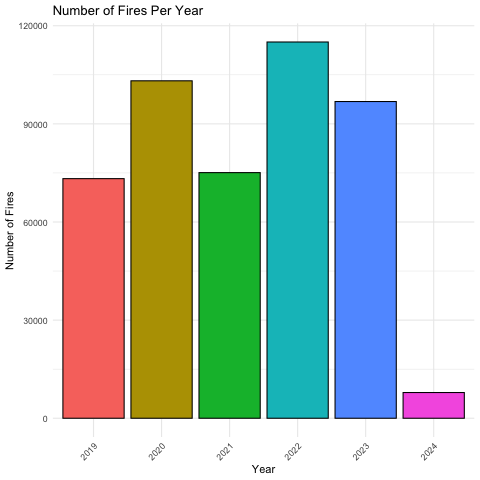

In [14]:
%%R -i fires_per_year

library(ggplot2)

# Assuming 'fires_per_year' is your data frame with the 'year' and 'focuses' columns
fires_per_year <- data.frame(
  year = as.factor(c(2019, 2020, 2021, 2022, 2023, 2024)), # Convert year to factor for discrete x-axis
  focuses = c(73252, 103161, 75093, 115028, 96828, 7861)
)

# Create the bar chart
bar_chart <- ggplot(fires_per_year, aes(x = year, y = focuses, fill = year)) + 
  geom_bar(stat = "identity", color = "black", show.legend = FALSE) +
  theme_minimal() +
  labs(x = "Year", y = "Number of Fires", title = "Number of Fires Per Year") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Display the bar chart
print(bar_chart)


In [15]:
# Filtering the data for "floresta" class only, which might represent another category related to forest or vegetation
forest_data = data[data['class'].str.contains('floresta', case=False)]  # case=False for case insensitive matching

# Aggregating the data to count the number of fires per year for the "floresta" category
fires_per_year_forest = forest_data.groupby('year')['focuses'].sum().reset_index()

# Display the aggregated data
fires_per_year_forest


,year,focuses
0,2019,5300
1,2020,9697
2,2021,5836
3,2022,13477
4,2023,34012
5,2024,2655


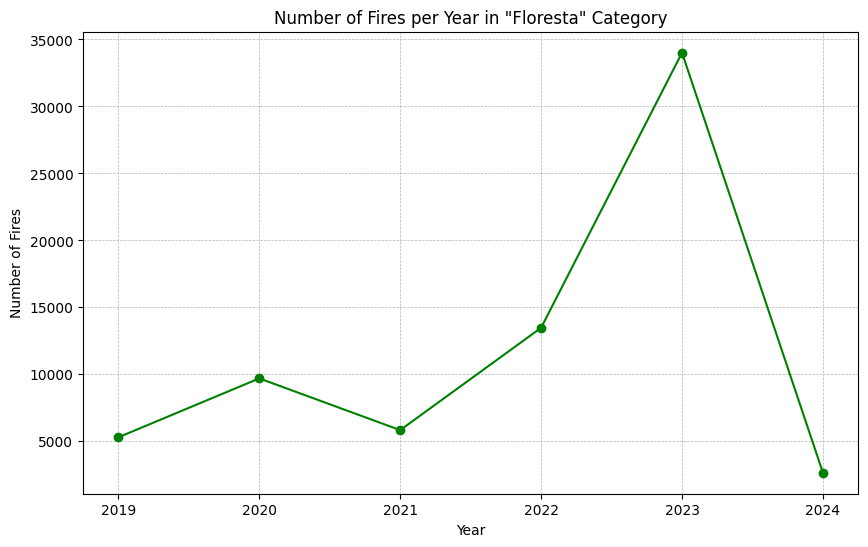

In [16]:

# Convert 'year' to integer for proper plotting
fires_per_year_forest['year'] = fires_per_year_forest['year'].astype(int)

# Sorting the data just in case
fires_per_year_forest.sort_values('year', inplace=True)

# Creating the line graph
plt.figure(figsize=(10, 6))
plt.plot(fires_per_year_forest['year'], fires_per_year_forest['focuses'], marker='o', linestyle='-', color='green')

# Adding titles and labels
plt.title('Number of Fires per Year in "Floresta" Category')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()
